In [ ]:
###Exercise 7.3
#data
bluecrab=as.matrix(read.table(url("http://www2.stat.duke.edu/~pdh10/FCBS/Exercises/bluecrab.dat")))
orangecrab=as.matrix(read.table(url("http://www2.stat.duke.edu/~pdh10/FCBS/Exercises/orangecrab.dat")))

#a
#bluecrab
Y=bluecrab
n=nrow(bluecrab)
ybar=colMeans(bluecrab)
Mu0=c(ybar)
Sigma=cov(bluecrab)
S0=Lambda0=Sigma
nu0=4

#Gibbs sampler
inv=solve
S=10000
MU=matrix(NA,nrow=S,ncol=2)
SIGMA=matrix(NA, nrow = S, ncol = 4)

for(s in 1:S){
  #update MU
  Lambdan=inv(inv(Lambda0)+n*inv(Sigma))
  Mun=Lambdan %*% (inv(Lambda0) %*% Mu0+n*inv(Sigma) %*% ybar )
  Mu=MASS::mvrnorm(n=1,Mun,Lambdan)
  #updata Sigma
  Sn=S0+(t(Y)-c(Mu)) %*% t(t(Y)-c(Mu))
  Sigma=inv(rWishart(1,nu0+n,inv(Sn))[,,1])
  MU[s,]=c(Mu)
  SIGMA[s,]=c(Sigma)
}


#orangecrab
Y=orangecrab
n=nrow(orangecrab)
ybar=colMeans(orangecrab)
Mu0=c(ybar)
Sigma=cov(orangecrab)
S0=Lambda0=Sigma
nu0=4

#Gibbs sampler
inv=solve
S=10000
MU1=matrix(NA,nrow=S,ncol=2)
SIGMA1=matrix(NA, nrow = S, ncol = 4)

for(s in 1:S){
  #update MU
  Lambdan=inv(inv(Lambda0)+n*inv(Sigma))
  Mun=Lambdan %*% (inv(Lambda0) %*% Mu0+n*inv(Sigma) %*% ybar )
  Mu=MASS::mvrnorm(n=1,Mun,Lambdan)
  #updata Sigma
  Sn=S0+(t(Y)-c(Mu)) %*% t(t(Y)-c(Mu))
  Sigma=inv(rWishart(1,nu0+n,inv(Sn))[,,1])
  MU1[s,]=c(Mu)
  SIGMA1[s,]=c(Sigma)
}



In [2]:
from IPython.display import Image

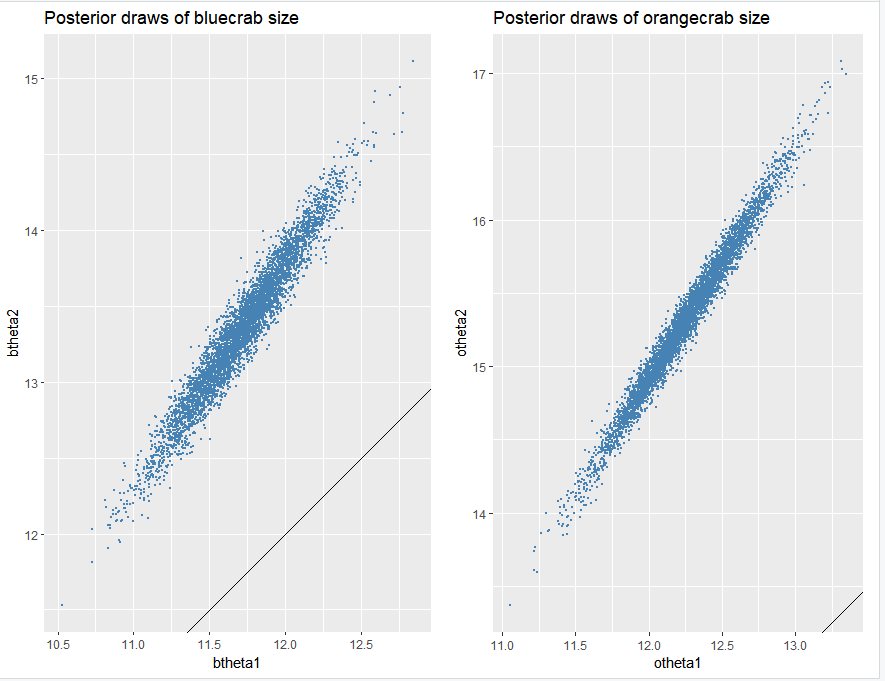

In [19]:
Image("C:/Users/yujinjeong/Desktop/111.png")

In [ ]:
#b
disp=tail(1:S,S/2)
title1="Posterior draws of bluecrab size"
p1=data.frame(btheta1=MU[disp,1],btheta2=MU[disp,2]) %>%
  ggplot(aes(x=btheta1,y=btheta2))+geom_point(size=0.5,color="steelblue")+
  geom_abline(slope=1,intercept = 0)+coord_fixed(ratio=1)+labs(title = title1)
p1

title1="Posterior draws of orangecrab size"
p2=data.frame(otheta1=MU1[disp,1],otheta2=MU1[disp,2]) %>%
  ggplot(aes(x=otheta1,y=otheta2))+geom_point(size=0.5,color="steelblue")+
  geom_abline(slope=1,intercept = 0)+coord_fixed(ratio=1)+labs(title = title1)

ggarrange(p1,p2)


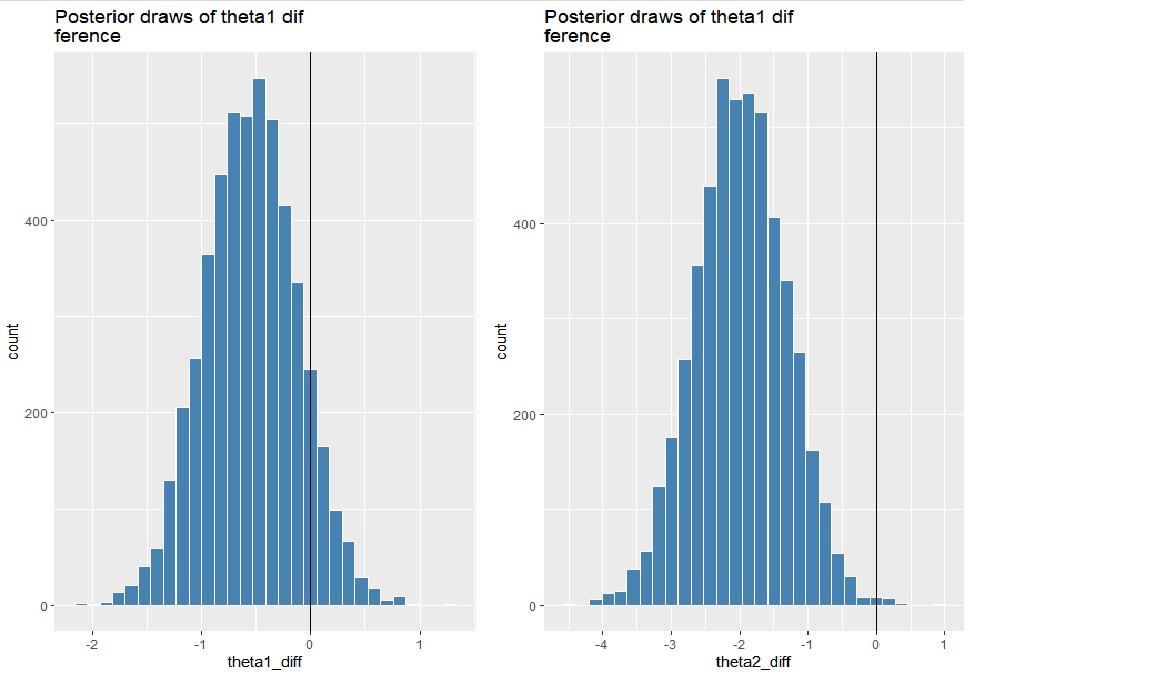

In [20]:
Image("C:/Users/yujinjeong/Desktop/1.jpg")

In [ ]:
title3="Posterior draws of theta1 dif
ference"
theta1_diff=MU[disp,1]-MU1[disp,1]
p3=data.frame(theta1_diff=theta1_diff) %>%
  ggplot(aes(x=theta1_diff))+
  geom_histogram(color="white",fill="steelblue",bins=30)+
  geom_vline(xintercept = 0)+
  labs(title=title3)
p3  

title4="Posterior draws of theta2 dif
ference"
theta2_diff=MU[disp,2]-MU1[disp,2]
p4=data.frame(theta2_diff=theta2_diff) %>%
  ggplot(aes(x=theta2_diff))+
  geom_histogram(color="white",fill="steelblue",bins=30)+
  geom_vline(xintercept = 0)+
  labs(title=title3)

ggarrange(p3,p4)  

mean(MU[disp,1]>MU1[disp,1])
mean(MU[disp,2]>MU1[disp,2])



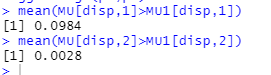

In [21]:
Image("C:/Users/yujinjeong/Desktop/3.png")

In [22]:
#c
bcorr=apply(SIGMA,MARGIN=1,FUN=function(SIGMA){
  SIGMA[2]/sqrt(SIGMA[1]*SIGMA[4])
})

ocorr=apply(SIGMA1,MARGIN=1,FUN=function(SIGMA){
  SIGMA[2]/sqrt(SIGMA[1]*SIGMA[4])
})

p5=data.frame(crab=c(rep('blue',length(bcorr)/2),
                         rep('orange',length(ocorr)/2)),
                     corr=c(bcorr[disp],ocorr[disp]))%>%
                ggplot(aes(x=corr,fill=crab))+
                geom_density(alpha=0.5)+
                scale_fill_manual(values=c('blue','orange'))

ggarrange(p5)

mean(bcorr<ocorr)



SyntaxError: invalid syntax (<ipython-input-22-96c7ae52faf6>, line 2)

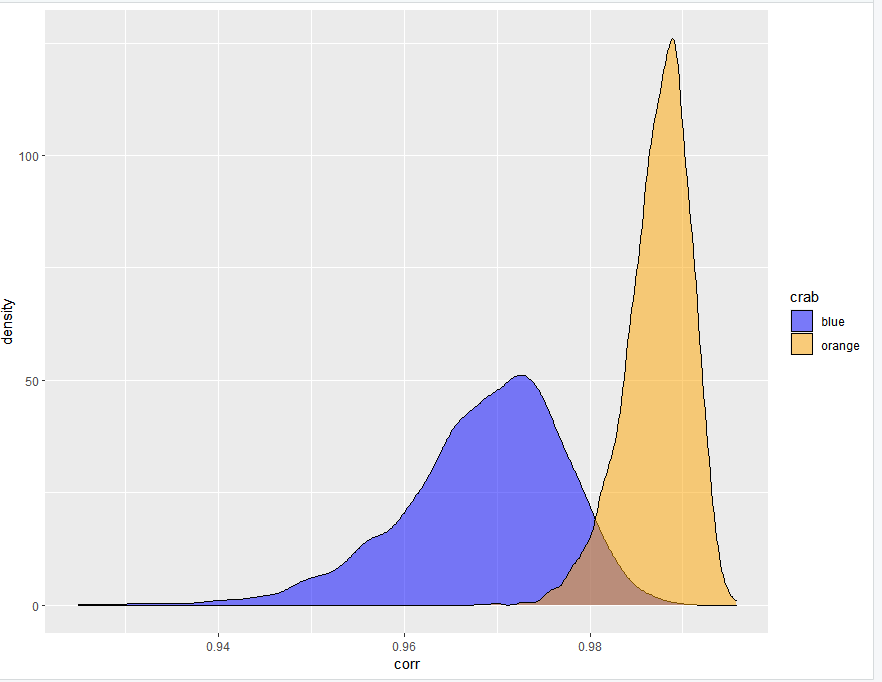

In [25]:
Image("C:/Users/yujinjeong/Desktop/4.png")

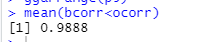

In [26]:
Image("C:/Users/yujinjeong/Desktop/5.png")